In [7]:
import os
os.system('rm ./training/image_2/*.txt')
os.system('cp ./training/label_2/*.txt ./training/image_2')

0

In [8]:
from PIL import Image
import os 
import glob

label_list = ['Car', 'Van', 'Truck', 'Tram']
drop_list = []
get_size = lambda xy, wh : str(float(xy)/wh)


pngs = glob.glob('./training/image_2/*.png')
txts = glob.glob('./training/image_2/*.txt')


XMIN, YMIN, XMAX, YMAX = 4, 5, 6, 7

for i, txt in enumerate(txts):
    
    with open(txt, 'r') as handle:
        s = ''
        for line in handle:
            tokens = line.split(' ')
            w, h = Image.open(pngs[i]).size
            if tokens[0] in drop_list:
                continue
            if tokens[0] not in label_list:
                keep = input('keep %s? (y/n)\n'%tokens[0])
                if keep.lower() != 'n':
                    label_list.append(tokens[0])
                else:
                    drop_list.append(tokens[0])
                    continue 
                    
            s += ('0 '+ get_size(tokens[4], w)+ ' '+ get_size(tokens[5], h) + ' '+ get_size(tokens[6], w) + ' '+ get_size(tokens[7], h) + '\n')
    with open(txt, 'w') as writehandle:
        writehandle.write(s)

keep Pedestrian? (y/n)
n
keep DontCare? (y/n)
n
keep Misc? (y/n)
n
keep Cyclist? (y/n)
n
keep Person_sitting? (y/n)
n


375 1242
375 1242


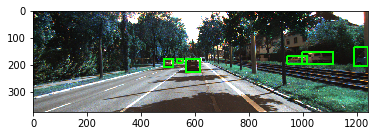

375 1242
375 1242


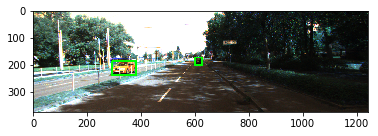

375 1242
375 1242


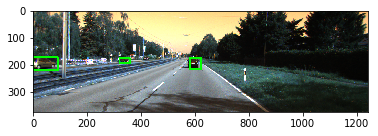

375 1242
375 1242


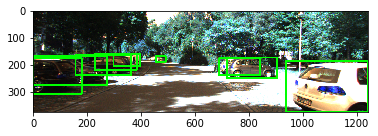

375 1242
375 1242


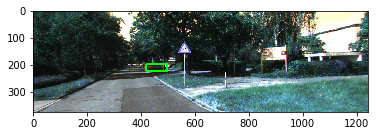

375 1242
375 1242


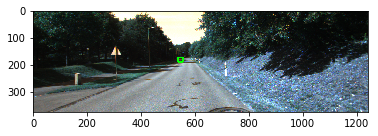

374 1238
374 1238


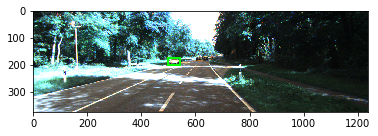

375 1242
375 1242


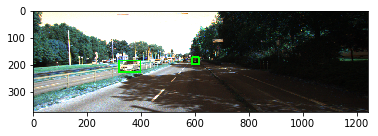

375 1242
375 1242


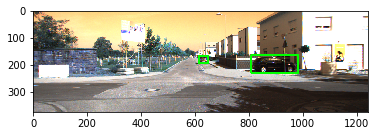

375 1242
375 1242


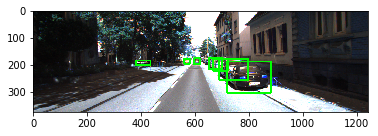

In [31]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
PATH_TO_TEST_IMAGES_DIR = 'training/image_2'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, im) for im in os.listdir(PATH_TO_TEST_IMAGES_DIR) if 
                    '.png' in im and 'TSD' not in im]
IMAGE_SIZE = (6, 4)
for png in TEST_IMAGE_PATHS[:10]:
    im = cv2.imread(png)
    h, w = im.shape[:2]
    boxes = []
    with open(png[:-4]+'.txt', 'r') as handle:
        for line in handle.readlines():
            tokens = line.split(' ')
            xmin = int(float(tokens[1])*w)
            ymin = int(float(tokens[2])*h)
            xmax = int(float(tokens[3])*w)
            ymax = int(float(tokens[4])*h)
            boxes.append(((xmin, ymin), (xmax, ymax)))
            
    for box in boxes:
        cv2.rectangle(im, box[0], box[1], thickness=5, color=(0,255,0))
        
    plt.imshow(im)
    plt.show()

256